In [1]:
DATA_PATH = "../input/coco-mini-5000"
TRAIN_IMAGES = f"{DATA_PATH}/images/train2017"
VAL_IMAGES = f"{DATA_PATH}/images/val2017"
TRAIN_LABELS = f"{DATA_PATH}/labels/train2017"
VAL_LABELS = f"{DATA_PATH}/labels/val2017"

In [2]:
!pip install -q ultralytics
from ultralytics import YOLO

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 26.6 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.7 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 8.0 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 17.2 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 13.5 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 8.2 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 87.6 MB/s eta 0:00:00:00:0100:01
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pylibcugraph-cu12 24.12.0 requires pylibraft-cu12==24.12.*, but you have pylibraft-cu12 25.2.0 which is

In [9]:
yaml_content = """
path: /kaggle/input/coco-mini-4000/coco-mini-4000
train: images/train2017
val: images/val2017
nc: 80
names: [ 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat',
         'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat',
         'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack',
         'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
         'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket',
         'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple',
         'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair',
         'couch', 'potted plant', 'bed', 'dining table', 'toilet', 'tv', 'laptop', 'mouse',
         'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink',
         'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier',
         'toothbrush' ]
"""

with open("coco-mini-4000.yaml", "w") as f:
    f.write(yaml_content)


In [8]:
!ls /kaggle/input/coco-mini-5000/images
!ls /kaggle/input/coco-mini-5000/labels

ls: cannot access '/kaggle/input/coco-mini-5000/images': No such file or directory
ls: cannot access '/kaggle/input/coco-mini-5000/labels': No such file or directory


In [11]:
from ultralytics import YOLO

model = YOLO("yolov8s.pt")

results = model.train(
    data="coco-mini-4000.yaml",
    epochs=15,
    imgsz=640,
    batch=8,
    project="kaggle_yolo_training",
    name="coco_mini_4000_run",
    save=True
)

Ultralytics 8.3.128 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=coco-mini-4000.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=15, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=coco_mini_4000_run2, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretra

train: Scanning /kaggle/input/coco-mini-4000/coco-mini-4000/labels/train2017... 4000 images, 28 backgrounds, 0 corrupt: 100%|██████████| 4000/4000 [00:03<00:00, 1046.59it/s]

train: /kaggle/input/coco-mini-4000/coco-mini-4000/images/train2017/000000214087.jpg: 1 duplicate labels removed
WARNING ⚠️ train: Cache directory /kaggle/input/coco-mini-4000/coco-mini-4000/labels is not writeable, cache not saved.


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 272.5±78.8 MB/s, size: 160.5 KB)


val: Scanning /kaggle/input/coco-mini-4000/coco-mini-4000/labels/val2017... 1000 images, 8 backgrounds, 0 corrupt: 100%|██████████| 1000/1000 [00:00<00:00, 1027.84it/s]

WARNING ⚠️ val: Cache directory /kaggle/input/coco-mini-4000/coco-mini-4000/labels is not writeable, cache not saved.


Plotting labels to kaggle_yolo_training/coco_mini_4000_run2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000119, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to kaggle_yolo_training/coco_mini_4000_run2
Starting training for 15 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/15      3.74G      1.071      1.125      1.183        162        640: 100%|██████████| 500/500 [01:18<00:00,  6.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:10<00:00,  6.24it/s]


                   all       1000       7762      0.656      0.547      0.587      0.428

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/15      4.74G      1.051      1.153      1.174        193        640: 100%|██████████| 500/500 [01:18<00:00,  6.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:08<00:00,  7.40it/s]


                   all       1000       7762      0.645       0.54      0.577      0.414

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/15      4.74G       1.06      1.164      1.169         79        640: 100%|██████████| 500/500 [01:18<00:00,  6.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:08<00:00,  7.36it/s]


                   all       1000       7762       0.63      0.512       0.56        0.4

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/15      4.74G      1.049      1.155      1.166        113        640: 100%|██████████| 500/500 [01:17<00:00,  6.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:08<00:00,  7.45it/s]


                   all       1000       7762      0.598      0.537      0.551      0.391

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/15      4.74G       1.05      1.132      1.161         93        640: 100%|██████████| 500/500 [01:17<00:00,  6.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:08<00:00,  7.42it/s]


                   all       1000       7762      0.628      0.505      0.548       0.39
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/15      4.74G      1.029      1.076      1.142         56        640: 100%|██████████| 500/500 [01:16<00:00,  6.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:08<00:00,  7.46it/s]


                   all       1000       7762      0.621      0.504      0.541      0.388

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/15      4.74G      1.002       0.99      1.124         49        640: 100%|██████████| 500/500 [01:16<00:00,  6.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:08<00:00,  7.35it/s]


                   all       1000       7762      0.605      0.514      0.548       0.39

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/15      4.74G     0.9846     0.9508      1.106         63        640: 100%|██████████| 500/500 [01:16<00:00,  6.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:08<00:00,  7.38it/s]


                   all       1000       7762      0.647      0.501      0.548      0.393

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/15      4.74G     0.9712      0.925      1.102         53        640: 100%|██████████| 500/500 [01:16<00:00,  6.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:08<00:00,  7.38it/s]


                   all       1000       7762      0.647      0.501      0.554      0.397

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/15      4.74G     0.9599     0.8896      1.097         29        640: 100%|██████████| 500/500 [01:16<00:00,  6.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:08<00:00,  7.34it/s]


                   all       1000       7762      0.624      0.513      0.552      0.397

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/15      4.74G     0.9454      0.854      1.084         39        640: 100%|██████████| 500/500 [01:16<00:00,  6.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:08<00:00,  7.44it/s]


                   all       1000       7762      0.615      0.529      0.551      0.396

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/15      4.74G     0.9377      0.831      1.076         43        640: 100%|██████████| 500/500 [01:16<00:00,  6.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:08<00:00,  7.43it/s]


                   all       1000       7762      0.661      0.501      0.551      0.393

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/15      4.74G     0.9244     0.8116      1.069         81        640: 100%|██████████| 500/500 [01:16<00:00,  6.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:08<00:00,  7.41it/s]


                   all       1000       7762      0.631      0.526      0.555      0.396

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/15      4.74G     0.9124     0.8012      1.064         32        640: 100%|██████████| 500/500 [01:16<00:00,  6.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:08<00:00,  7.44it/s]


                   all       1000       7762       0.66      0.505      0.554      0.399

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/15      4.74G     0.9088     0.7823      1.061         61        640: 100%|██████████| 500/500 [01:16<00:00,  6.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:08<00:00,  7.50it/s]


                   all       1000       7762      0.621      0.528      0.557      0.401

15 epochs completed in 0.360 hours.
Optimizer stripped from kaggle_yolo_training/coco_mini_4000_run2/weights/last.pt, 22.6MB
Optimizer stripped from kaggle_yolo_training/coco_mini_4000_run2/weights/best.pt, 22.6MB

Validating kaggle_yolo_training/coco_mini_4000_run2/weights/best.pt...
Ultralytics 8.3.128 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,156,544 parameters, 0 gradients, 28.6 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:09<00:00,  6.66it/s]


                   all       1000       7762      0.654      0.547      0.587      0.428
                person        539       2405      0.832      0.662      0.774      0.551
               bicycle         21         48      0.952      0.414      0.626       0.34
                   car        114        418      0.725      0.533      0.654       0.42
            motorcycle         36         95      0.914       0.56      0.737      0.441
              airplane         23         39      0.809      0.795      0.853      0.674
                   bus         42         66      0.844      0.773      0.822      0.704
                 train         32         38      0.813        0.8      0.852      0.687
                 truck         53         82      0.576      0.329      0.463      0.323
                  boat         26        101      0.562      0.376      0.419      0.226
         traffic light         40        137      0.676      0.358      0.453      0.236
          fire hydran

/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


Speed: 0.2ms preprocess, 3.1ms inference, 0.0ms loss, 1.5ms postprocess per image
Results saved to kaggle_yolo_training/coco_mini_4000_run2


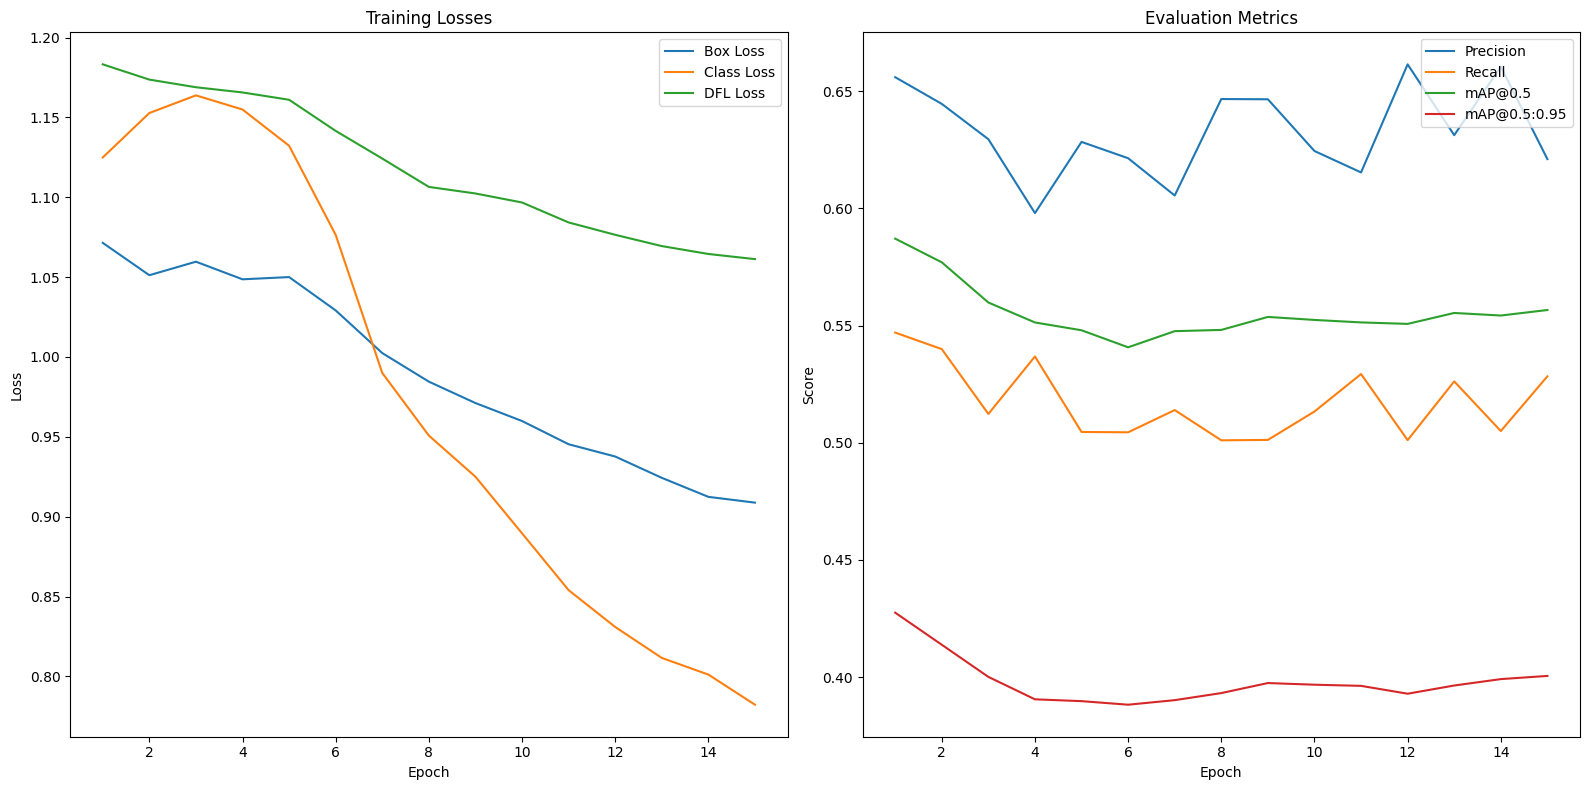

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 8))

# Plot Training Losses
plt.subplot(1, 2, 1)
plt.plot(df['epoch'], df['train/box_loss'], label='Box Loss')
plt.plot(df['epoch'], df['train/cls_loss'], label='Class Loss')
plt.plot(df['epoch'], df['train/dfl_loss'], label='DFL Loss')
plt.title("Training Losses")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

# Plot Evaluation Metrics
plt.subplot(1, 2, 2)
plt.plot(df['epoch'], df['metrics/precision(B)'], label='Precision')
plt.plot(df['epoch'], df['metrics/recall(B)'], label='Recall')
plt.plot(df['epoch'], df['metrics/mAP50(B)'], label='mAP@0.5')
plt.plot(df['epoch'], df['metrics/mAP50-95(B)'], label='mAP@0.5:0.95')
plt.title("Evaluation Metrics")
plt.xlabel("Epoch")
plt.ylabel("Score")
plt.legend()

plt.tight_layout()
plt.show()

In [18]:
!pip install -q ultralytics

In [20]:
import os
import glob
import numpy as np
from ultralytics import YOLO
from sklearn.metrics import classification_report

# Load model
model = YOLO("/kaggle/working/kaggle_yolo_training/coco_mini_4000_run2/weights/best.pt")

# Dataset paths
val_img_dir = "/kaggle/input/coco-mini-4000/coco-mini-4000/images/val2017"
val_lbl_dir = "/kaggle/input/coco-mini-4000/coco-mini-4000/labels/val2017"

y_true = []
y_pred = []

# Collect validation images
image_paths = sorted(glob.glob(os.path.join(val_img_dir, "*.jpg")))

for img_path in image_paths:
    base_name = os.path.basename(img_path).replace(".jpg", ".txt")
    label_path = os.path.join(val_lbl_dir, base_name)

    # Ground truth classes
    gt_classes = []
    if os.path.exists(label_path):
        with open(label_path, "r") as f:
            for line in f:
                cls_id = int(float(line.split()[0]))
                gt_classes.append(cls_id)
    if not gt_classes:
        continue  # Skip if no labels

   
    result = model.predict(img_path, conf=0.25, iou=0.5, verbose=False)[0]
    pred_classes = result.boxes.cls.cpu().numpy().astype(int) if result.boxes else []

    # Match predicted length to ground truth length for comparison
    if len(pred_classes) >= len(gt_classes):
        y_true.extend(gt_classes)
        y_pred.extend(pred_classes[:len(gt_classes)])
    else:
        y_true.extend(gt_classes[:len(pred_classes)])
        y_pred.extend(pred_classes)

# Print clean classification report
print(classification_report(y_true, y_pred, zero_division=0))


              precision    recall  f1-score   support

           0       0.59      0.60      0.60      1963
           1       0.35      0.21      0.26        42
           2       0.47      0.48      0.47       305
           3       0.52      0.48      0.50        67
           4       0.64      0.71      0.68        35
           5       0.46      0.46      0.46        57
           6       0.57      0.67      0.62        36
           7       0.28      0.27      0.27        52
           8       0.77      0.81      0.79        70
           9       0.51      0.45      0.48        88
          10       0.70      0.83      0.76        23
          11       0.50      0.75      0.60         8
          12       0.32      0.50      0.39        12
          13       0.16      0.15      0.16        33
          14       0.72      0.72      0.72        88
          15       0.59      0.65      0.62        31
          16       0.45      0.42      0.44        33
          17       0.30    

In [22]:
import os
import glob
import numpy as np
from ultralytics import YOLO
from sklearn.metrics import classification_report

# Load the trained model again
model = YOLO("/kaggle/working/kaggle_yolo_training/coco_mini_4000_run2/weights/best.pt")

val_img_dir = "/kaggle/input/coco-mini-4000/coco-mini-4000/images/val2017"
val_lbl_dir = "/kaggle/input/coco-mini-4000/coco-mini-4000/labels/val2017"

y_true = []
y_pred = []

image_paths = sorted(glob.glob(os.path.join(val_img_dir, "*.jpg")))

for img_path in image_paths:
    base_name = os.path.basename(img_path).replace(".jpg", ".txt")
    label_path = os.path.join(val_lbl_dir, base_name)

    gt_classes = []
    if os.path.exists(label_path):
        with open(label_path, "r") as f:
            for line in f:
                cls_id = int(float(line.split()[0]))
                gt_classes.append(cls_id)

    if not gt_classes:
        continue

    result = model.predict(img_path, conf=0.25, iou=0.5, verbose=False)[0]
    pred_classes = result.boxes.cls.cpu().numpy().astype(int) if result.boxes else []

    if len(pred_classes) >= len(gt_classes):
        y_true.extend(gt_classes)
        y_pred.extend(pred_classes[:len(gt_classes)])
    else:
        y_true.extend(gt_classes[:len(pred_classes)])
        y_pred.extend(pred_classes)


In [84]:
from sklearn.metrics import classification_report

report = classification_report(y_true, y_pred, output_dict=True, zero_division=0)

# Save it to file
import json
with open("yolov8_classification_report.json", "w") as f:
    json.dump(report, f, indent=2)

In [82]:
from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred, zero_division=0))


              precision    recall  f1-score   support

           0       0.54      0.94      0.69       837
           1       0.00      0.00      0.00        16
           2       0.45      0.54      0.49       164
           3       0.33      0.03      0.05        34
           4       0.43      0.18      0.25        17
           5       0.36      0.28      0.31        36
           6       0.00      0.00      0.00         9
           7       0.00      0.00      0.00        22
           8       0.00      0.00      0.00        23
           9       0.00      0.00      0.00        31
          10       0.00      0.00      0.00        11
          11       0.00      0.00      0.00         4
          12       0.00      0.00      0.00         2
          13       0.00      0.00      0.00         3
          14       0.00      0.00      0.00        14
          15       0.00      0.00      0.00         3
          16       0.00      0.00      0.00         7
          17       0.00    

In [25]:
# COCO class names (0 to 79)
coco_classes = [
    'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat',
    'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat',
    'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack',
    'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
    'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket',
    'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple',
    'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair',
    'couch', 'potted plant', 'bed', 'dining table', 'toilet', 'tv', 'laptop', 'mouse',
    'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink',
    'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier',
    'toothbrush'
]

from sklearn.metrics import classification_report

# Generate the report dictionary
report_dict = classification_report(y_true, y_pred, zero_division=0, output_dict=True)

# Format results as table
rows = []
for i in range(80):
    cls_name = coco_classes[i]
    metrics = report_dict.get(str(i))
    if metrics:
        rows.append({
            "Class ID": i,
            "Class Name": cls_name,
            "Precision": round(metrics['precision'], 2),
            "Recall": round(metrics['recall'], 2),
            "F1-Score": round(metrics['f1-score'], 2),
            "Support": int(metrics['support'])
        })

import pandas as pd

df_report = pd.DataFrame(rows)
df_report.head(80)  # Show full COCO class-wise report



,Class ID,Class Name,Precision,Recall,F1-Score,Support
0,0,person,0.59,0.60,0.60,1963
1,1,bicycle,0.35,0.21,0.26,42
2,2,car,0.47,0.48,0.47,305
3,3,motorcycle,0.52,0.48,0.50,67
4,4,airplane,0.64,0.71,0.68,35
...,...,...,...,...,...,...
75,75,vase,0.27,0.50,0.35,20
76,76,scissors,0.67,0.50,0.57,4
77,77,teddy bear,0.79,0.73,0.76,30
78,78,hair drier,0.00,0.00,0.00,3


In [26]:
!git clone https://github.com/ultralytics/yolov5
%cd yolov5
!pip install -r requirements.txt

Cloning into 'yolov5'...
remote: Enumerating objects: 17430, done.
remote: Counting objects: 100% (103/103), done.
remote: Compressing objects: 100% (77/77), done.
remote: Total 17430 (delta 73), reused 28 (delta 26), pack-reused 17327 (from 4)
Receiving objects: 100% (17430/17430), 16.31 MiB | 31.39 MiB/s, done.
Resolving deltas: 100% (11944/11944), done.
/kaggle/working/yolov5


In [31]:
!cp /kaggle/working/coco-mini-4000.yaml /kaggle/working/yolov5/

In [32]:
import os
os.environ["WANDB_MODE"] = "disabled" 

!python train.py \
  --img 640 \
  --batch 8 \
  --epochs 15 \
  --data coco-mini-4000.yaml \
  --weights yolov5m.pt \
  --project yolov5_train \
  --name coco_mini_4000_run \
  --exist-ok


wandb: WARNING ⚠️ wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
2025-05-08 02:07:13.344621: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1746670033.367857     363 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1746670033.374986     363 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
train: weights=yolov5m.pt, cfg=, data=coco-mini-4000.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=15, batch_size=8, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data/hyps, resume_evolve=N

In [42]:
import pandas as pd

df = pd.read_csv("/kaggle/working/yolov5/yolov5_train/coco_mini_4000_run/results.csv")
df.head()


,epoch,train/box_loss,train/obj_loss,train/cls_loss,metrics/precision,metrics/recall,metrics/mAP_0.5,metrics/mAP_0.5:0.95,val/box_loss,val/obj_loss,val/cls_loss,x/lr0,x/lr1,x/lr2
0,0,0.040248,0.064222,0.020144,0.67664,0.55920,0.60927,0.41629,0.039788,0.051266,0.015046,0.070060,0.003327,0.003327
1,1,0.040979,0.063493,0.020173,0.64317,0.51350,0.55209,0.36300,0.042323,0.053230,0.017803,0.039620,0.006220,0.006220
2,2,0.042826,0.064344,0.021470,0.58583,0.48174,0.50876,0.32106,0.045738,0.055878,0.022150,0.008741,0.008674,0.008674
3,3,0.045104,0.066898,0.024890,0.50392,0.45556,0.44852,0.27191,0.047543,0.057991,0.025495,0.008020,0.008020,0.008020
4,4,0.045274,0.067367,0.024841,0.59136,0.42325,0.45867,0.28373,0.047561,0.056894,0.025126,0.008020,0.008020,0.008020


In [48]:
import pandas as pd


df = pd.read_csv("/kaggle/working/yolov5/yolov5_train/coco_mini_4000_run/results.csv")
df.columns = df.columns.str.strip()  # 🔧 removes leading spaces from column names


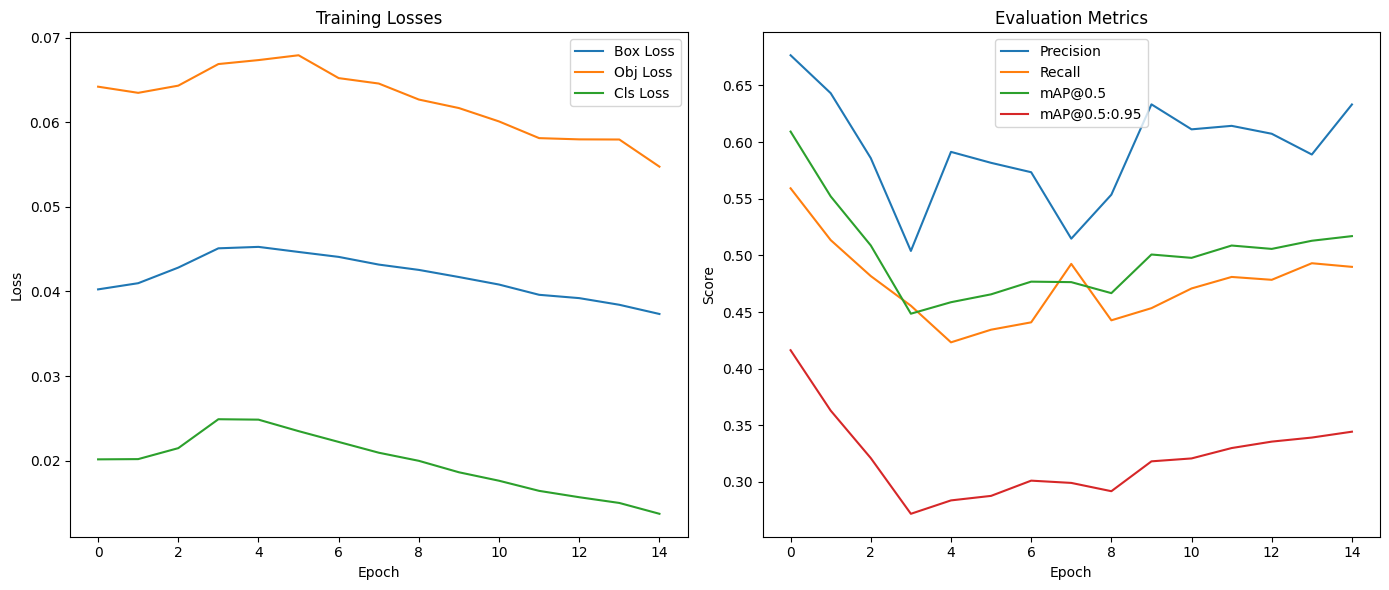

In [49]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))

# 🔸 Training Losses
plt.subplot(1, 2, 1)
plt.plot(df['epoch'], df['train/box_loss'], label='Box Loss')
plt.plot(df['train/obj_loss'], label='Obj Loss')
plt.plot(df['train/cls_loss'], label='Cls Loss')
plt.title("Training Losses")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

# 🔸 Evaluation Metrics
plt.subplot(1, 2, 2)
plt.plot(df['metrics/precision'], label='Precision')
plt.plot(df['metrics/recall'], label='Recall')
plt.plot(df['metrics/mAP_0.5'], label='mAP@0.5')
plt.plot(df['metrics/mAP_0.5:0.95'], label='mAP@0.5:0.95')
plt.title("Evaluation Metrics")
plt.xlabel("Epoch")
plt.ylabel("Score")
plt.legend()

plt.tight_layout()
plt.show()


In [51]:
!find /kaggle/working -name best.pt

/kaggle/working/yolov5/yolov5_train/coco_mini_4000_run/weights/best.pt
/kaggle/working/kaggle_yolo_training/coco_mini_4000_run2/weights/best.pt


In [55]:
import os
import glob
import torch
import numpy as np
from pathlib import Path
from sklearn.metrics import classification_report
from PIL import Image
from torchvision import transforms


model = torch.hub.load("ultralytics/yolov5", "custom", path="/kaggle/working/yolov5/yolov5_train/coco_mini_4000_run/weights/best.pt", force_reload=True)
model.conf = 0.25  # confidence threshold

# Paths
val_img_dir = "/kaggle/input/coco-mini-4000/coco-mini-4000/images/val2017"
val_lbl_dir = "/kaggle/input/coco-mini-4000/coco-mini-4000/labels/val2017"

y_true = []
y_pred = []

image_paths = sorted(glob.glob(f"{val_img_dir}/*.jpg"))

for img_path in image_paths:
    label_path = os.path.join(val_lbl_dir, os.path.basename(img_path).replace(".jpg", ".txt"))

    # Read ground truth labels
    gt_classes = []
    if os.path.exists(label_path):
        with open(label_path, 'r') as f:
            for line in f:
                cls_id = int(float(line.split()[0]))
                gt_classes.append(cls_id)
    if not gt_classes:
        continue

    # Inference
    results = model(img_path, size=640)
    pred_classes = results.xywh[0][:, -1].cpu().numpy().astype(int) if len(results.xywh[0]) else []

    # Match length of predictions with ground truth
    if len(pred_classes) >= len(gt_classes):
        y_true.extend(gt_classes)
        y_pred.extend(pred_classes[:len(gt_classes)])
    else:
        y_true.extend(gt_classes[:len(pred_classes)])
        y_pred.extend(pred_classes)

# Final classification report
print(classification_report(y_true, y_pred, zero_division=0))


Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 v7.0-416-gfe1d4d99 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
Model summary: 212 layers, 21172173 parameters, 0 gradients, 48.9 GFLOPs
Adding AutoShape... 


              precision    recall  f1-score   support

           0       0.60      0.59      0.60      2173
           1       0.38      0.37      0.37        46
           2       0.49      0.52      0.51       366
           3       0.44      0.44      0.44        80
           4       0.60      0.70      0.65        37
           5       0.37      0.44      0.40        55
           6       0.57      0.60      0.58        35
           7       0.31      0.28      0.29        65
           8       0.77      0.83      0.80        83
           9       0.44      0.50      0.47       109
          10       0.79      0.76      0.78        25
          11       0.88      0.70      0.78        10
          12       0.37      0.47      0.41        15
          13       0.16      0.15      0.16        39
          14       0.78      0.68      0.73        88
          15       0.50      0.53      0.51        34
          16       0.47      0.48      0.48        33
          17       0.52    

In [56]:
!git clone https://github.com/ultralytics/yolov3
%cd yolov3
!pip install -r requirements.txt

Cloning into 'yolov3'...
remote: Enumerating objects: 12205, done.
remote: Counting objects: 100% (131/131), done.
remote: Compressing objects: 100% (98/98), done.
remote: Total 12205 (delta 59), reused 39 (delta 33), pack-reused 12074 (from 2)
Receiving objects: 100% (12205/12205), 10.75 MiB | 32.46 MiB/s, done.
Resolving deltas: 100% (8256/8256), done.
/kaggle/working/yolov5/yolov3


In [58]:
!cp /kaggle/working/coco-mini-4000.yaml /kaggle/working/yolov5/yolov3/

In [59]:
!python train.py \
  --img 640 \
  --batch 8 \
  --epochs 15 \
  --data coco-mini-4000.yaml \
  --cfg models/yolov3.yaml \
  --weights '' \
  --name coco_mini_yolov3 \
  --project yolov3_train \
  --exist-ok

wandb: WARNING ⚠️ wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
2025-05-08 03:12:35.712153: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1746673955.734998   15572 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1746673955.743325   15572 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
train: weights=, cfg=models/yolov3.yaml, data=coco-mini-4000.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=15, batch_size=8, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=F

In [60]:
!find /kaggle/working -name results.csv

/kaggle/working/yolov5/yolov3/yolov3_train/coco_mini_yolov3/results.csv
/kaggle/working/yolov5/yolov5_train/coco_mini_4000_run/results.csv
/kaggle/working/kaggle_yolo_training/coco_mini_4000_run2/results.csv


In [64]:
import pandas as pd

df = pd.read_csv("/kaggle/working/yolov5/yolov3/yolov3_train/coco_mini_yolov3/results.csv")
df.columns = df.columns.str.strip()  
print(df.columns.tolist())


['epoch', 'train/box_loss', 'train/obj_loss', 'train/cls_loss', 'metrics/precision', 'metrics/recall', 'metrics/mAP_0.5', 'metrics/mAP_0.5:0.95', 'val/box_loss', 'val/obj_loss', 'val/cls_loss', 'x/lr0', 'x/lr1', 'x/lr2']


In [69]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv("/kaggle/working/yolov5/yolov3/yolov3_train/coco_mini_yolov3/results.csv")  # replace with actual path
df.columns = df.columns.str.strip()

# 🔹 Training Loss Plot
plt.figure(figsize=(8, 5))
plt.plot(df['epoch'], df['train/box_loss'], label='Box Loss')
plt.plot(df['train/obj_loss'], label='Obj Loss')
plt.plot(df['train/cls_loss'], label='Cls Loss')
plt.title("YOLOv3 Training Losses")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.tight_layout()
plt.savefig("yolov3_training_losses.png")  # 📸 Save loss graph
plt.close()

# 🔹 Evaluation Metrics Plot
plt.figure(figsize=(8, 5))
plt.plot(df['epoch'], df['metrics/precision'], label='Precision')
plt.plot(df['metrics/recall'], label='Recall')
plt.plot(df['metrics/mAP_0.5'], label='mAP@0.5')
plt.plot(df['metrics/mAP_0.5:0.95'], label='mAP@0.5:0.95')
plt.title("YOLOv3 Evaluation Metrics")
plt.xlabel("Epoch")
plt.ylabel("Score")
plt.legend()
plt.tight_layout()
plt.savefig("yolov3_eval_metrics.png")  # 📸 Save metrics graph
plt.close()


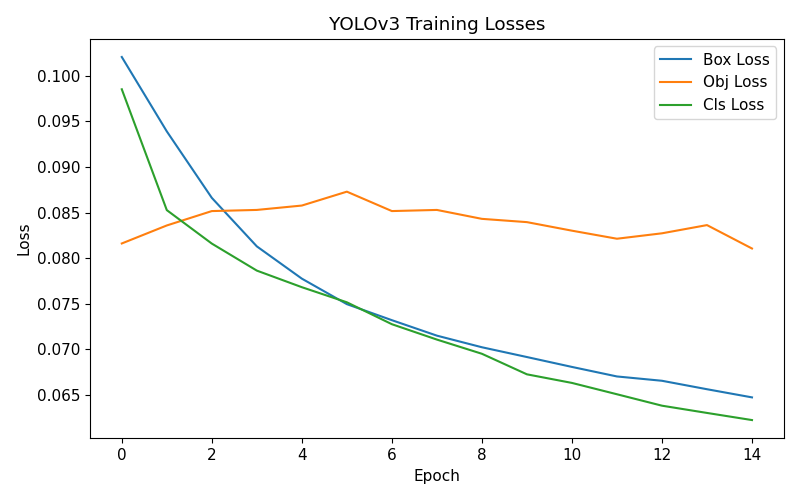

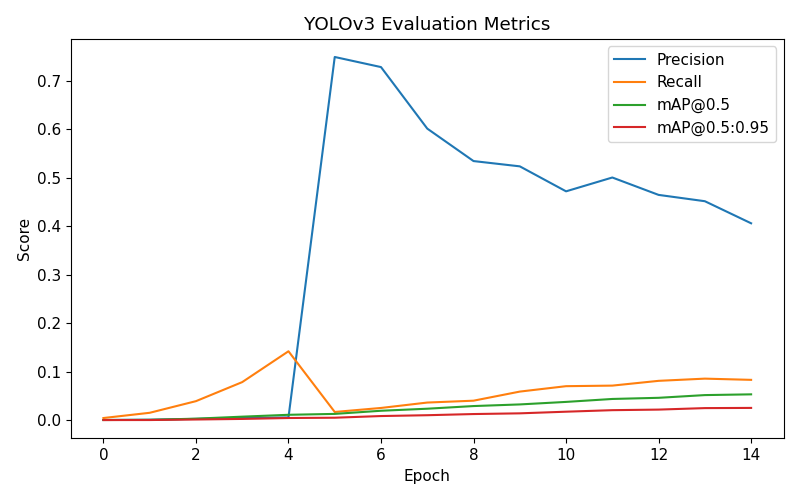

In [70]:
from IPython.display import Image, display
display(Image(filename="yolov3_training_losses.png"))
display(Image(filename="yolov3_eval_metrics.png"))


In [73]:
import os
import glob
import torch
import numpy as np
from sklearn.metrics import classification_report


model = torch.hub.load("ultralytics/yolov3", "custom", path="/kaggle/working/yolov5/yolov3/yolov3_train/coco_mini_yolov3/weights/best.pt", force_reload=True)
model.conf = 0.25  # confidence threshold

# Dataset paths
val_img_dir = "/kaggle/input/coco-mini-4000/coco-mini-4000/images/val2017"
val_lbl_dir = "/kaggle/input/coco-mini-4000/coco-mini-4000/labels/val2017"

y_true = []
y_pred = []

# Load validation images
image_paths = sorted(glob.glob(os.path.join(val_img_dir, "*.jpg")))

for img_path in image_paths:
    label_path = os.path.join(val_lbl_dir, os.path.basename(img_path).replace(".jpg", ".txt"))

    # Ground truth labels
    gt_classes = []
    if os.path.exists(label_path):
        with open(label_path, "r") as f:
            for line in f:
                cls_id = int(float(line.strip().split()[0]))
                gt_classes.append(cls_id)
    if not gt_classes:
        continue

    # Run YOLOv3 inference
    results = model(img_path, size=640)
    pred_classes = results.xywh[0][:, -1].cpu().numpy().astype(int) if len(results.xywh[0]) else []

    # Match predicted vs ground truth
    if len(pred_classes) >= len(gt_classes):
        y_true.extend(gt_classes)
        y_pred.extend(pred_classes[:len(gt_classes)])
    else:
        y_true.extend(gt_classes[:len(pred_classes)])
        y_pred.extend(pred_classes)

# Final classification report
print(classification_report(y_true, y_pred, zero_division=0))


Downloading: "https://github.com/ultralytics/yolov3/zipball/master" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 v7.0-416-gfe1d4d99 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
yolov3 summary: 190 layers, 61922845 parameters, 0 gradients, 155.9 GFLOPs
Adding AutoShape... 


              precision    recall  f1-score   support

           0       0.54      0.94      0.69       837
           1       0.00      0.00      0.00        16
           2       0.45      0.54      0.49       164
           3       0.33      0.03      0.05        34
           4       0.43      0.18      0.25        17
           5       0.36      0.28      0.31        36
           6       0.00      0.00      0.00         9
           7       0.00      0.00      0.00        22
           8       0.00      0.00      0.00        23
           9       0.00      0.00      0.00        31
          10       0.00      0.00      0.00        11
          11       0.00      0.00      0.00         4
          12       0.00      0.00      0.00         2
          13       0.00      0.00      0.00         3
          14       0.00      0.00      0.00        14
          15       0.00      0.00      0.00         3
          16       0.00      0.00      0.00         7
          17       0.00    

In [114]:
import pandas as pd
import matplotlib.pyplot as plt


# Format: [Precision, Recall, mAP@0.5, mAP@0.5:0.95]
manual_metrics = {
    "YOLOv3": [0.406, 0.083, 0.0532, 0.0251],  
    "YOLOv5": [0.675, 0.560, 0.609, 0.416],
    "YOLOv8": [0.6551, 0.5472, 0.5871, 0.4282]
}

# Create summary DataFrame
summary = []
for model, values in manual_metrics.items():
    summary.append({
        "Model": model,
        "Precision": values[0],
        "Recall": values[1],
        "mAP@0.5": values[2],
        "mAP@0.5:0.95": values[3]
    })

comparison_df = pd.DataFrame(summary)

# Plotting
ax = comparison_df.set_index("Model").plot(kind="bar", figsize=(10, 6))
plt.title("YOLOv3 vs YOLOv5 vs YOLOv8 - Performance Comparison")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.ylim(0, 1.0)
plt.grid(axis="y")
plt.tight_layout()

# Save and show
plt.savefig("yolo_comparison_manual.png")
plt.show()


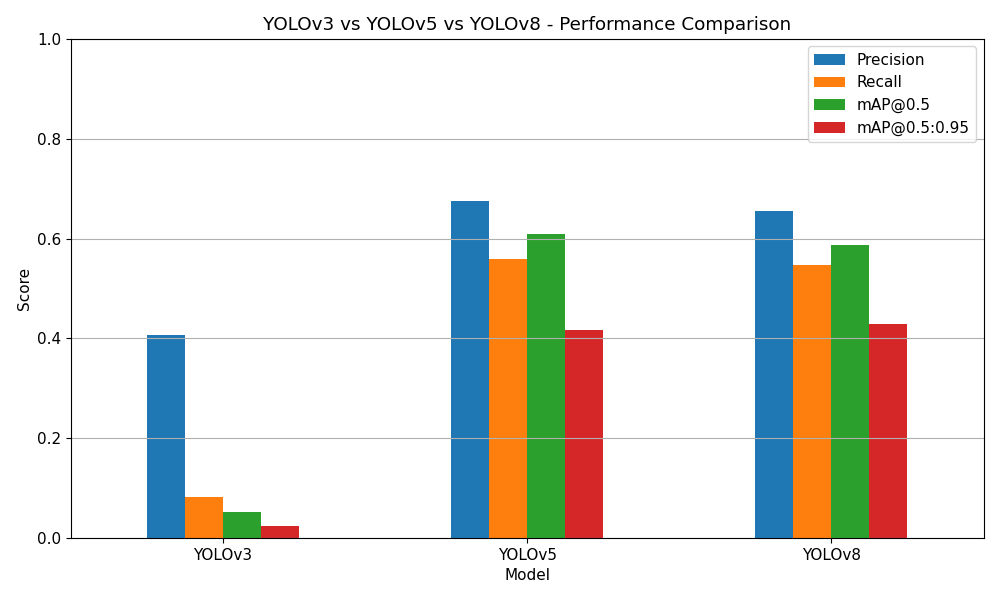

In [115]:
from IPython.display import Image, display

# Display the saved image
display(Image("yolo_comparison_manual.png"))


In [1]:
from tabulate import tabulate

# Manually entered metrics
data = [
    ["YOLOv3", 0.406, 0.083, 0.0532, 0.0251],
    ["YOLOv5", 0.675, 0.560, 0.6090, 0.4160],
    ["YOLOv8", 0.6551, 0.5472, 0.5871, 0.4282]
]

# Column headers
headers = ["Model", "Precision", "Recall", "mAP@0.5", "mAP@0.5:0.95"]

# Print the table
print(tabulate(data, headers=headers, tablefmt="grid"))


+---------+-------------+----------+-----------+----------------+
| Model   |   Precision |   Recall |   mAP@0.5 |   mAP@0.5:0.95 |
+=========+=============+==========+===========+================+
| YOLOv3  |      0.406  |   0.083  |    0.0532 |         0.0251 |
+---------+-------------+----------+-----------+----------------+
| YOLOv5  |      0.675  |   0.56   |    0.609  |         0.416  |
+---------+-------------+----------+-----------+----------------+
| YOLOv8  |      0.6551 |   0.5472 |    0.5871 |         0.4282 |
+---------+-------------+----------+-----------+----------------+
